In [12]:
import pandas as pd

results_file = "results/r_20240926_1.csv"

df = pd.read_csv(results_file)
df.head()

,cv-folds,dataset,estimator,estimator_details,omics,train_accuracy,test_accuracy,fss_nogueira,fss_lustgarten,fss_jaccard_index,avg_features,all_features,runs,estimator_alt_name
0,5,BLCA,SVM_f21,"LinearSVC(C=0.0034867736816406245, dual=False,...",__ALL__,0.807367,0.756471,0.555606,0.600074,0.388763,16.933333,100451,15,SVM_low
1,5,BLCA,SVM_f92,"LinearSVC(C=0.010840039062500001, dual=False, ...",__ALL__,0.956592,0.821075,0.466211,0.480192,0.305340,90.933333,100451,15,SVM_med
2,5,BLCA,SVM_f168,"LinearSVC(C=0.030367382812499996, dual=False, ...",__ALL__,1.000000,0.832468,0.418162,0.425442,0.265826,163.000000,100451,15,SVM_high
3,5,BLCA,LR_f21,"LogisticRegression(C=0.013952209472656248, max...",__ALL__,0.807585,0.756471,0.558932,0.604431,0.391747,16.866667,100451,15,LR_low
4,5,BLCA,LR_f92,"LogisticRegression(C=0.0479419921875, max_iter...",__ALL__,0.963134,0.815824,0.460439,0.479223,0.300684,86.600000,100451,15,LR_med


In [13]:
# test_accuracy

df_test_accuracy = pd.DataFrame(columns=["Classifier",]+list(df.omics.unique()))

for estimator_name in df.estimator_alt_name.unique():
    df_estimator = df.query(f"estimator_alt_name=='{estimator_name}'")
    new_row = {"Classifier": estimator_name}
    for omics in df.omics.unique():
        new_row[omics] = df_estimator.query(f"omics=='{omics}'").test_accuracy.mean()
    df_test_accuracy = pd.concat([df_test_accuracy, pd.DataFrame(new_row, index=[1])])

df_test_accuracy.reset_index(drop=True, inplace=True)

df_test_accuracy

,Classifier,__ALL__,cnv,mirna,mutation,rna
0,SVM_low,0.783834,0.734846,0.767761,0.726443,0.789156
1,SVM_med,0.805694,0.758805,0.762058,0.721609,0.804852
2,SVM_high,0.792637,0.744524,0.723896,0.707808,0.793352
3,LR_low,0.783966,0.726356,0.767973,0.725894,0.786753
4,LR_med,0.802500,0.758030,0.760375,0.719841,0.802263
5,LR_high,0.803330,0.750968,0.735386,0.708965,0.803248
6,Lasso_low,0.782985,0.742177,0.768959,0.725854,0.783872
7,Lasso_med,0.808002,0.763609,0.767350,0.723252,0.806654
8,Lasso_high,0.805799,0.757214,0.752569,0.712378,0.807814


<ipython-input-14-d7845526e447>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


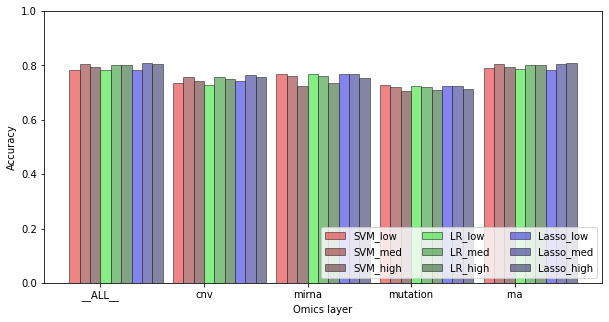

In [14]:
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.1

omics = df_test_accuracy.columns[1:]
ind = np.arange(len(omics))

colors = [
    (0.9, 0.2, 0.2, 0.6), (0.6, 0.2, 0.2, 0.6), (0.4, 0.2, 0.2, 0.6),
    (0.2, 0.9, 0.2, 0.6), (0.2, 0.6, 0.2, 0.6), (0.2, 0.4, 0.2, 0.6),
    (0.2, 0.2, 0.9, 0.6), (0.2, 0.2, 0.6, 0.6), (0.2, 0.2, 0.4, 0.6),
]

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
#ax.set_title("Test accuracy averaged over datasets")
ax.set_xlabel("Omics layer")
ax.set_ylabel("Accuracy")
ax.set_ylim([0, 1.0])
for i,row in df_test_accuracy.iterrows():
    ax.bar(
        ind+i*barWidth, row[1:].values,
        width = barWidth,
        edgecolor = (0.2, 0.2, 0.2, 0.6),
        color = colors[i],
        label = f'{row.Classifier}'
    )
ax.set_xticks(ind+barWidth*len(ind)/2)
ax.set_xticklabels(omics)
ax.legend(loc='lower right', ncol=3)
fig.show()

In [15]:
# fss_nogueira

df_fss_nogueira = pd.DataFrame(columns=["Classifier",]+list(df.omics.unique()))

for estimator_name in df.estimator_alt_name.unique():
    df_estimator = df.query(f"estimator_alt_name=='{estimator_name}'")
    new_row = {"Classifier": estimator_name}
    for omics in df.omics.unique():
        new_row[omics] = df_estimator.query(f"omics=='{omics}'").fss_nogueira.mean()
    df_fss_nogueira = pd.concat([df_fss_nogueira, pd.DataFrame(new_row, index=[1])])

df_fss_nogueira.reset_index(drop=True, inplace=True)

df_fss_nogueira

,Classifier,__ALL__,cnv,mirna,mutation,rna
0,SVM_low,0.492316,0.435916,0.589815,0.422501,0.488588
1,SVM_med,0.395681,0.380839,0.475281,0.396802,0.385363
2,SVM_high,0.353693,0.365529,0.368839,0.365877,0.345510
3,LR_low,0.527959,0.448716,0.591032,0.422693,0.513407
4,LR_med,0.413566,0.387374,0.478573,0.403529,0.414235
5,LR_high,0.403161,0.370550,0.393758,0.383975,0.397689
6,Lasso_low,0.483047,0.434694,0.595131,0.420501,0.469759
7,Lasso_med,0.406909,0.376061,0.489684,0.397955,0.395415
8,Lasso_high,0.375170,0.365644,0.410514,0.365202,0.363432


<ipython-input-16-4f9535ccbe6b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


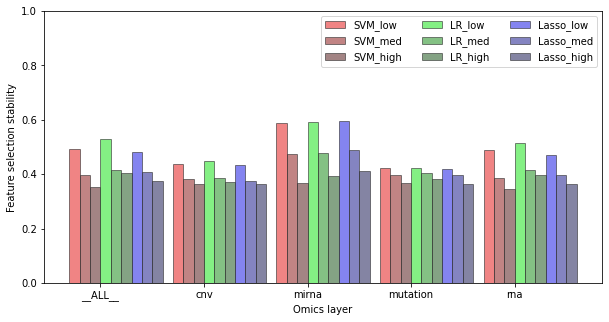

In [16]:
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.1

omics = df_fss_nogueira.columns[1:]
ind = np.arange(len(omics))

colors = [
    (0.9, 0.2, 0.2, 0.6), (0.6, 0.2, 0.2, 0.6), (0.4, 0.2, 0.2, 0.6),
    (0.2, 0.9, 0.2, 0.6), (0.2, 0.6, 0.2, 0.6), (0.2, 0.4, 0.2, 0.6),
    (0.2, 0.2, 0.9, 0.6), (0.2, 0.2, 0.6, 0.6), (0.2, 0.2, 0.4, 0.6),
]

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
#ax.set_title("FSS Nogueira averaged over datasets")
ax.set_xlabel("Omics layer")
ax.set_ylabel("Feature selection stability")
ax.set_ylim([0, 1.0])
for i,row in df_fss_nogueira.iterrows():
    ax.bar(
        ind+i*barWidth, row[1:].values,
        width = barWidth,
        edgecolor = (0.2, 0.2, 0.2, 0.6),
        color = colors[i],
        label = f'{row.Classifier}'
    )
ax.set_xticks(ind+barWidth*len(ind)/2)
ax.set_xticklabels(omics)
ax.legend(loc='upper right', ncol=3)
fig.show()

In [17]:
# weighted harmonic mean

def generate_hm(beta=1):
    df_hm = (1.0 + beta) / (1/df_test_accuracy.iloc[:,1:] + beta/df_fss_nogueira.iloc[:,1:])
    df_hm.insert(0, "Classifier", df_test_accuracy.Classifier)
    return df_hm

generate_hm(1)

,Classifier,__ALL__,cnv,mirna,mutation,rna
0,SVM_low,0.604778,0.547218,0.667126,0.534270,0.603520
1,SVM_med,0.530722,0.507146,0.585436,0.512040,0.521184
2,SVM_high,0.489126,0.490328,0.488684,0.482396,0.481377
3,LR_low,0.630984,0.554737,0.667984,0.534274,0.621346
4,LR_med,0.545837,0.512729,0.587426,0.517153,0.546364
5,LR_high,0.536881,0.496240,0.512891,0.498151,0.531989
6,Lasso_low,0.597487,0.548268,0.670969,0.532509,0.587463
7,Lasso_med,0.541247,0.503942,0.597851,0.513414,0.530690
8,Lasso_high,0.511972,0.493154,0.531243,0.482863,0.501322


<ipython-input-25-63ef9ea5394e>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


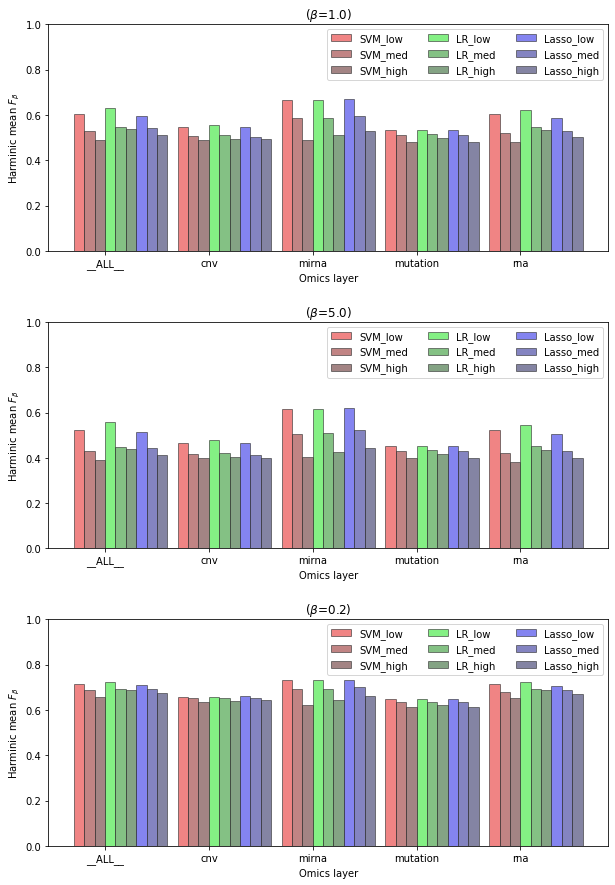

In [25]:
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.1

omics = df_fss_nogueira.columns[1:]
ind = np.arange(len(omics))

colors = [
    (0.9, 0.2, 0.2, 0.6), (0.6, 0.2, 0.2, 0.6), (0.4, 0.2, 0.2, 0.6),
    (0.2, 0.9, 0.2, 0.6), (0.2, 0.6, 0.2, 0.6), (0.2, 0.4, 0.2, 0.6),
    (0.2, 0.2, 0.9, 0.6), (0.2, 0.2, 0.6, 0.6), (0.2, 0.2, 0.4, 0.6),
]

fig, axes = plt.subplots(3, 1, figsize = (8.5, 12))
fig.tight_layout(h_pad=5, w_pad=0)
betas = [1.0, 5.0, 0.2]
for i, (ax,beta) in enumerate(zip(axes,betas)):
    ax.set_title("("+r"$\beta$"+"="+f"{beta}"+")")
    ax.set_xlabel("Omics layer")
    ax.set_ylabel("Harminic mean " + r"$F_{\beta}$")
    ax.set_ylim([0, 1.0])
    df_hm = generate_hm(beta)
    for i,row in df_hm.iterrows():
        ax.bar(
            ind+i*barWidth, row[1:].values,
            width = barWidth,
            edgecolor = (0.2, 0.2, 0.2, 0.6),
            color = colors[i],
            label = f'{row.Classifier}'
        )
    ax.set_xticks(ind+barWidth*len(ind)/2)
    ax.set_xticklabels(omics)
    ax.legend(loc='upper right', ncol=3)
fig.show()

<ipython-input-19-af4dfcdc8923>:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


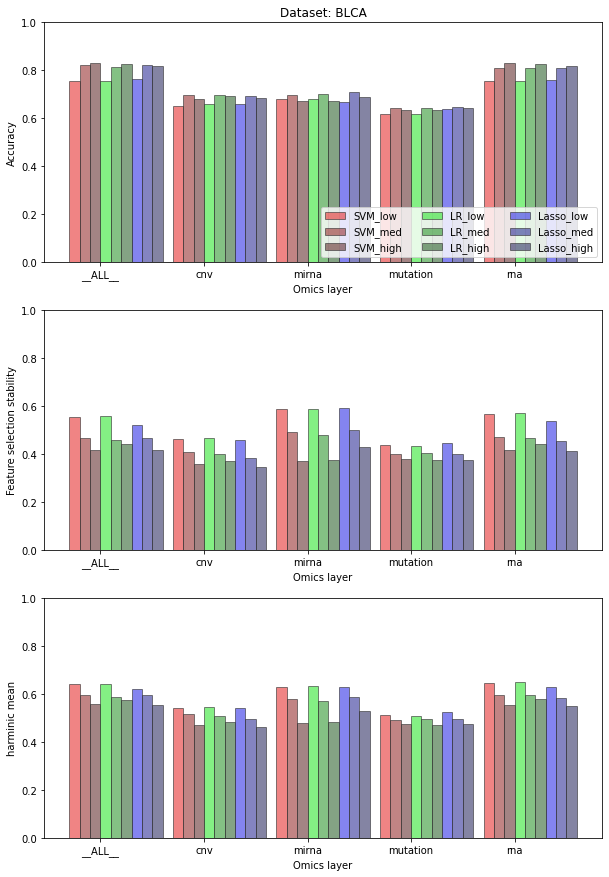

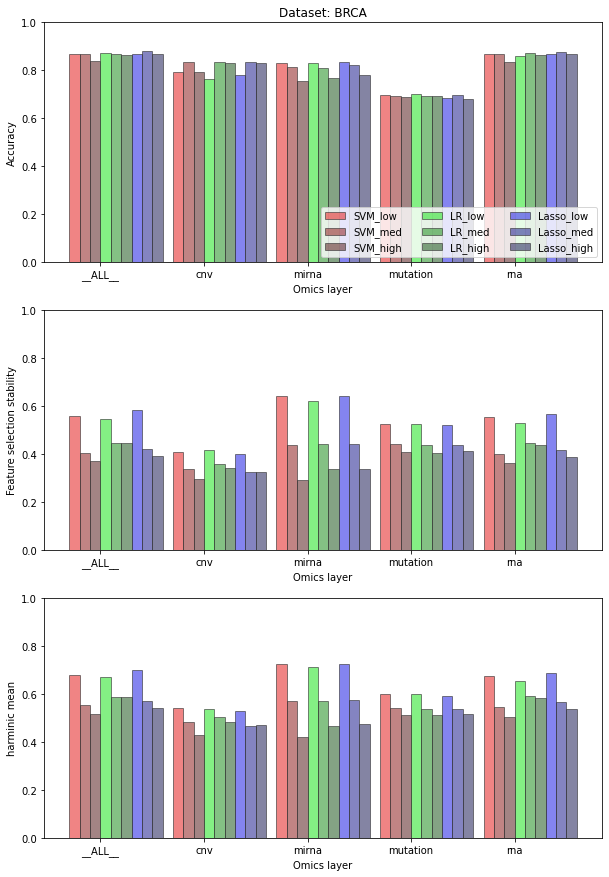

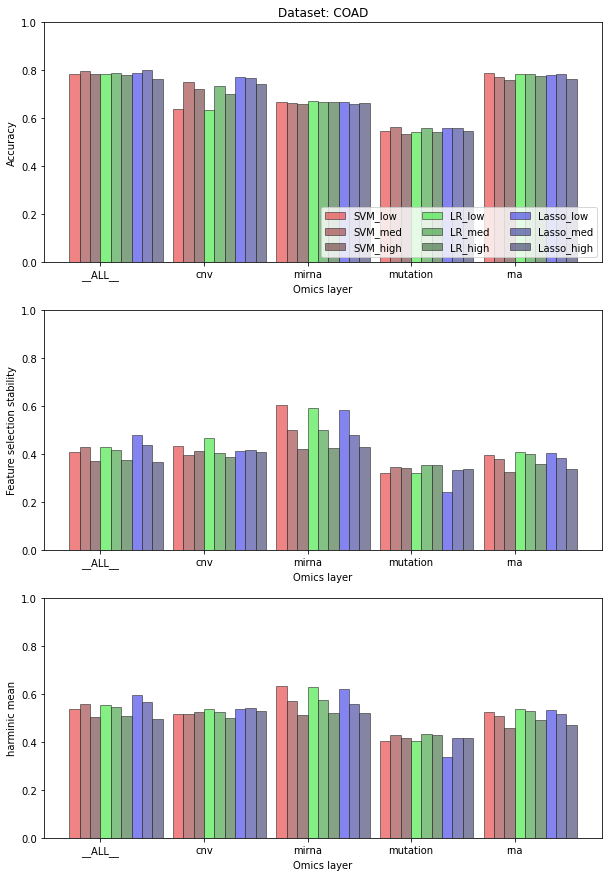

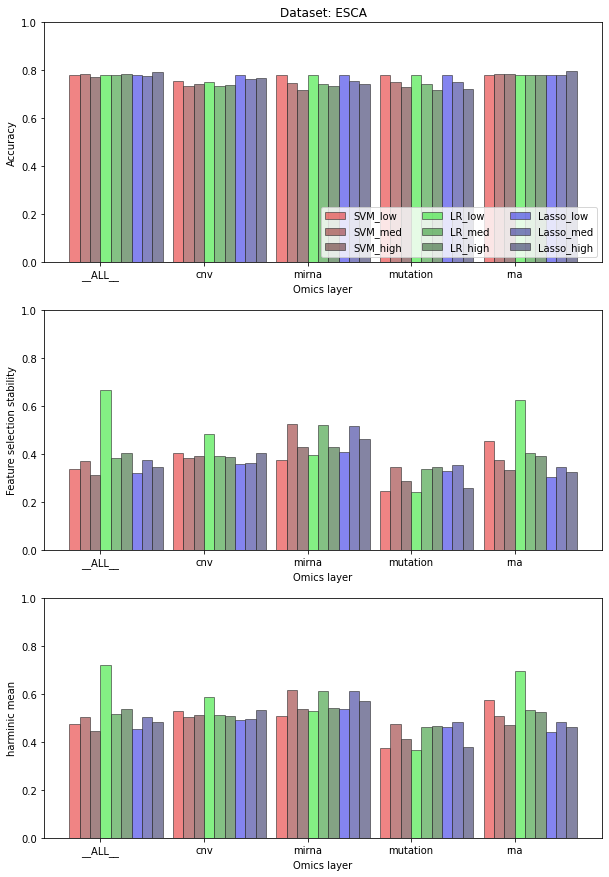

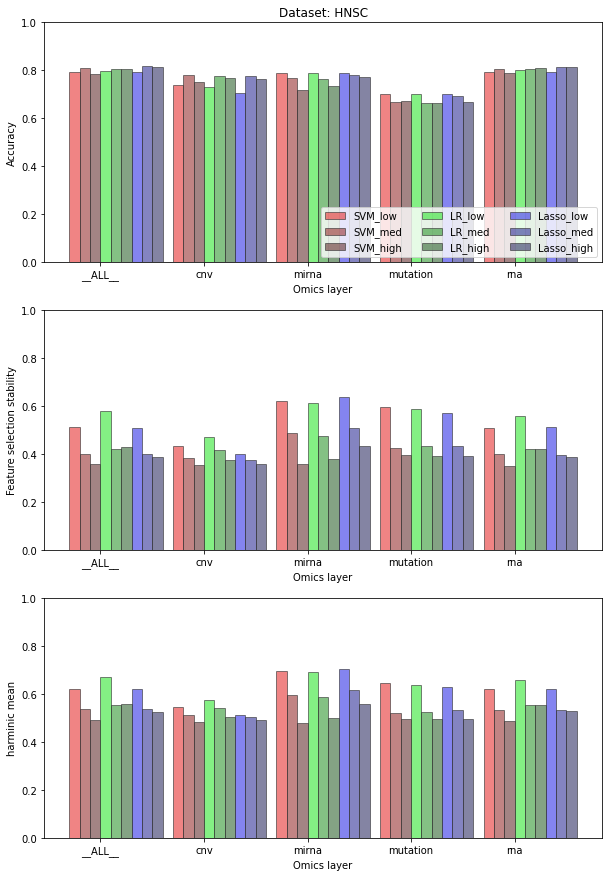

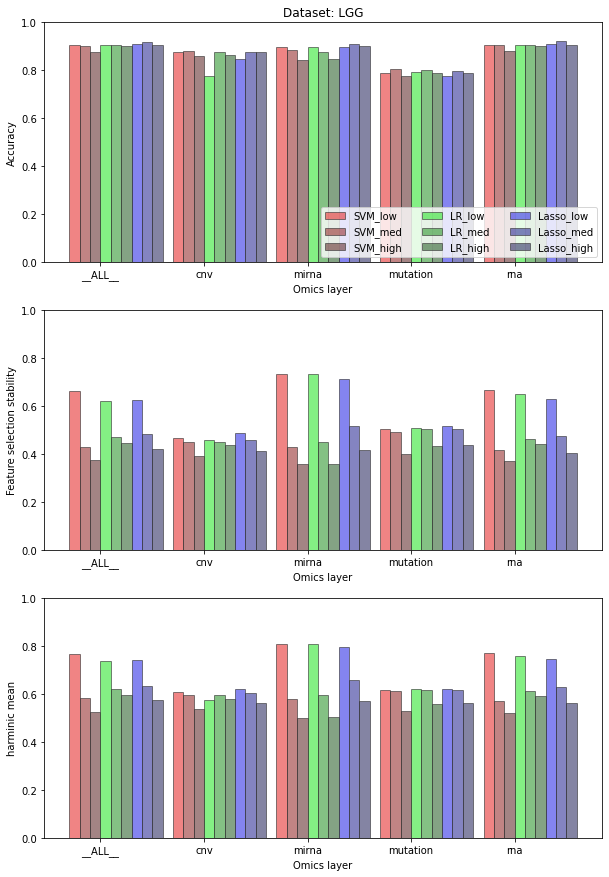

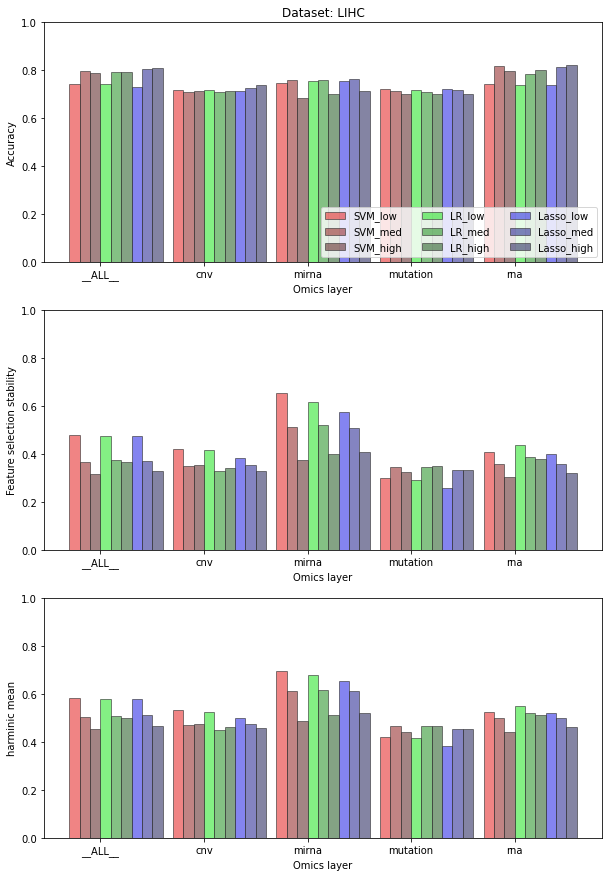

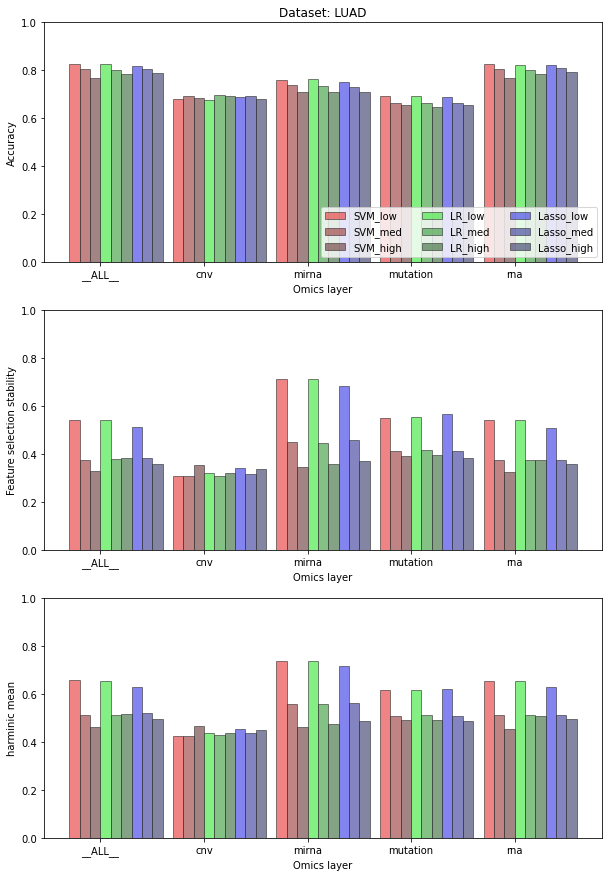

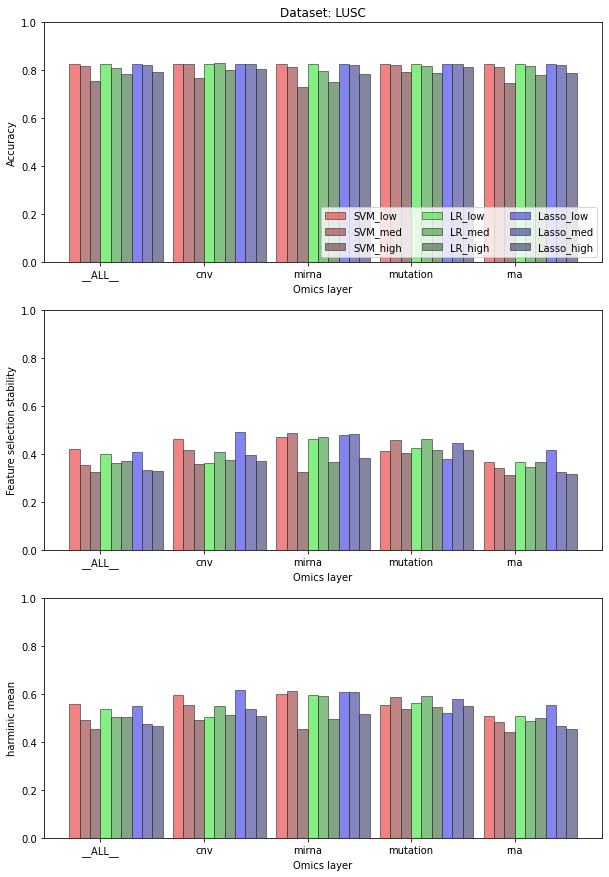

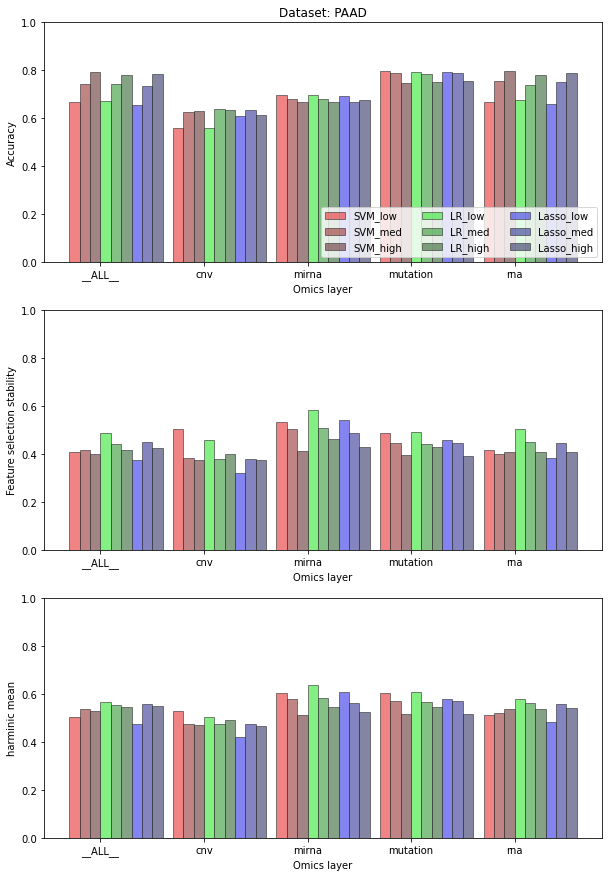

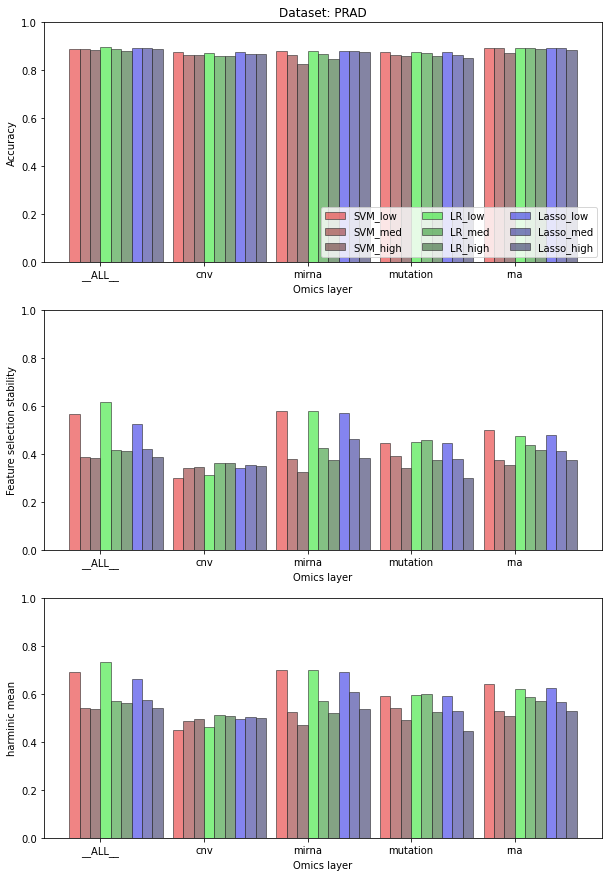

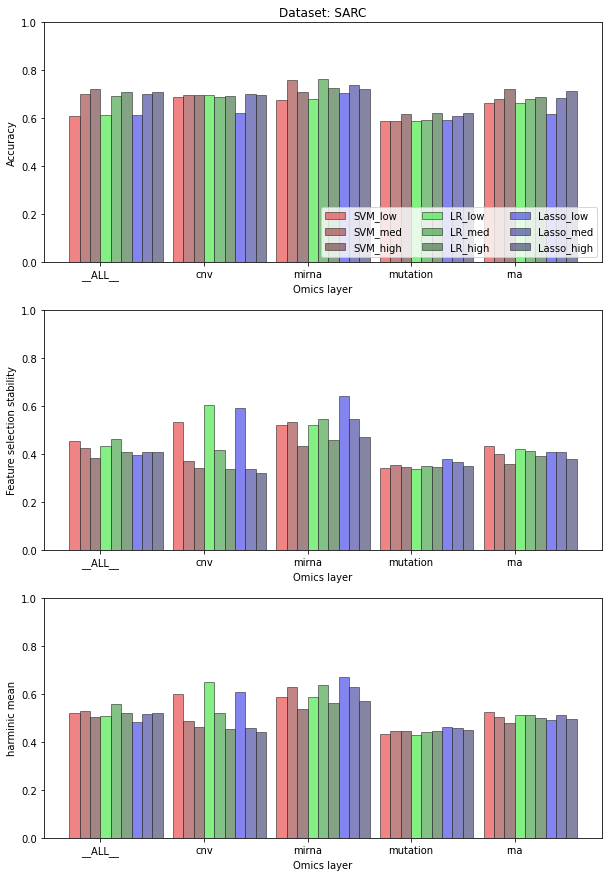

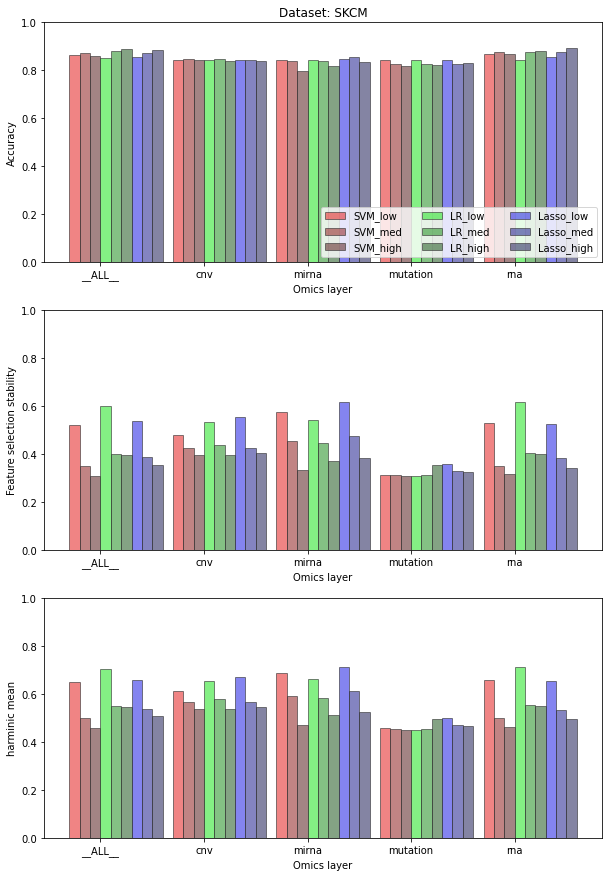

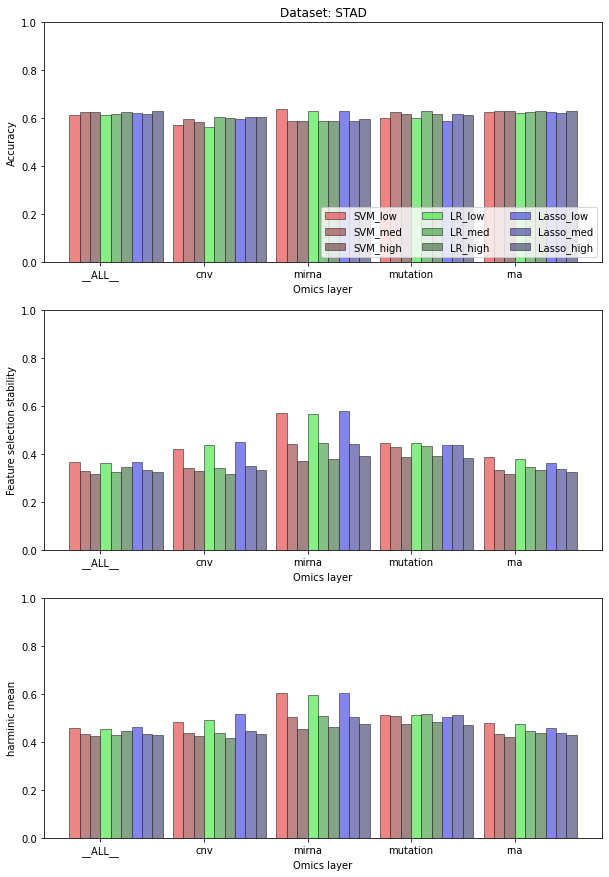

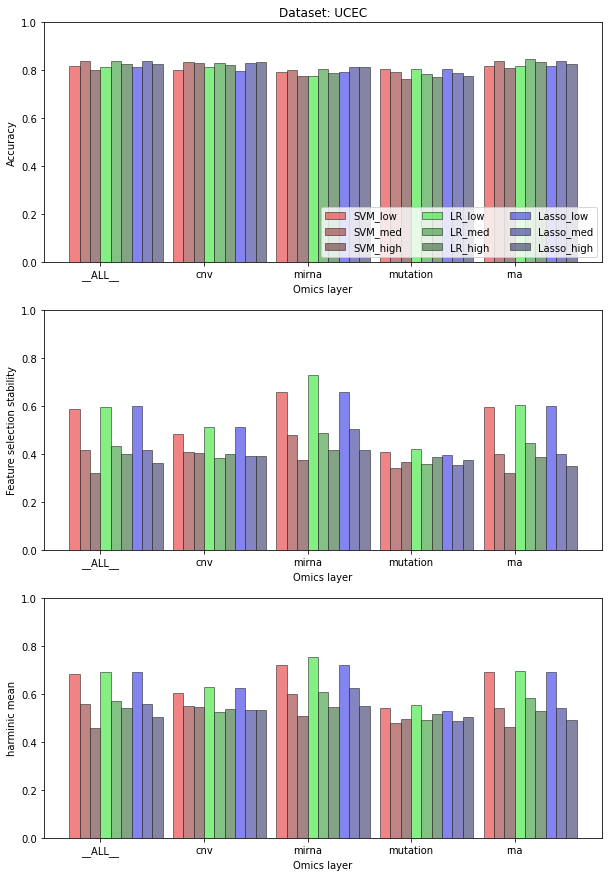

In [19]:
# Results presented at individual dataset level
# -- test_accuracy for different omics
# -- fss_nogueira for different omics
# -- harmonic mean for different omics

import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.1

omics = list(df.omics.unique())
ind = np.arange(len(omics))

colors = [
    (0.9, 0.2, 0.2, 0.6), (0.6, 0.2, 0.2, 0.6), (0.4, 0.2, 0.2, 0.6),
    (0.2, 0.9, 0.2, 0.6), (0.2, 0.6, 0.2, 0.6), (0.2, 0.4, 0.2, 0.6),
    (0.2, 0.2, 0.9, 0.6), (0.2, 0.2, 0.6, 0.6), (0.2, 0.2, 0.4, 0.6),
]

for dataset in df.dataset.unique():
    df_dataset = df[df.dataset == dataset]
    fig, axes = plt.subplots(3, 1, figsize = (10, 15))
    ax_acc, ax_fss, ax_harm = axes
    ax_acc.set_title(f"Dataset: {dataset}")
    ax_acc.set_xlabel("Omics layer")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_ylim([0, 1.0])
    ax_fss.set_xlabel("Omics layer")
    ax_fss.set_ylabel("Feature selection stability")
    ax_fss.set_ylim([0, 1.0])
    ax_harm.set_xlabel("Omics layer")
    ax_harm.set_ylabel("harminic mean")
    ax_harm.set_ylim([0, 1.0])
    for i,estimator in enumerate(df_dataset.estimator_alt_name.unique()):
        df_dataset_estimator = df_dataset[df_dataset.estimator_alt_name == estimator]
        acc = np.array([df_dataset_estimator[df_dataset_estimator.omics == o].iloc[0].test_accuracy for o in omics])
        fss = np.array([df_dataset_estimator[df_dataset_estimator.omics == o].iloc[0].fss_nogueira for o in omics])
        harm = 2/(1/acc + 1/fss)
        ax_acc.bar(
            ind+i*barWidth, acc,
            width = barWidth,
            edgecolor = (0.2, 0.2, 0.2, 0.6),
            color = colors[i],
            label = f'{estimator}'
        )
        ax_fss.bar(
            ind+i*barWidth, fss,
            width = barWidth,
            edgecolor = (0.2, 0.2, 0.2, 0.6),
            color = colors[i],
            label = f'{estimator}'
        )
        ax_harm.bar(
            ind+i*barWidth, harm,
            width = barWidth,
            edgecolor = (0.2, 0.2, 0.2, 0.6),
            color = colors[i],
            label = f'{estimator}'
        )
    ax_acc.set_xticks(ind+barWidth*len(ind)/2)
    ax_acc.set_xticklabels(omics)
    ax_acc.legend(loc='lower right', ncol=3)
    ax_fss.set_xticks(ind+barWidth*len(ind)/2)
    ax_fss.set_xticklabels(omics)
    ax_harm.set_xticks(ind+barWidth*len(ind)/2)
    ax_harm.set_xticklabels(omics)
    fig.show()